<a href="https://colab.research.google.com/github/preetmodi/Credit-Risk-Analytics/blob/main/Woe_calculation_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser 
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"

/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=lU3qj301Hq9iDcad6smXO-7-TX8cmK58Ia3ZeVmxos0'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Cannot retrieve auth tokens.
Failure("Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.

In [2]:
pip install scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-py3-none-any.whl size=57843 sha256=9154bf0cc7c0de8721fed37dc7d3a71be03785adc717c12f0d21660b036fd34d
  Stored in directory: /root/.cache/pip/wheels/16/7d/83/3c16d429c2ab9d345b31613f9f802432453fbf8c8bbaf8121e
Successfully built scorecardpy


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scorecardpy as sc
%matplotlib inline

In [4]:
%cd /content/gdrive/My Drive/Data/
# df = pd.read_csv("transformed_data.csv", low_memory=False, index_col=0)

/content/gdrive/My Drive/Data


In [5]:
train = pd.read_csv("Train.csv", low_memory=False, index_col=0)
test = pd.read_csv("Test.csv", low_memory=False, index_col=0)


In [6]:
train.Default = train.Default.astype(float)
train.bank_dlq = train.bank_dlq.astype(float)
train.il_acc = train.il_acc.astype(float)
train.dtypes

loan_amnt                     float64
term                           object
installment                   float64
home_ownership                 object
annual_inc                    float64
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
application_type               object
dti_joint                     float64
tot_coll_amt                  float64
tot_cur_bal                   float64
total_bal_il                  float64
il_util                       float64
acc_open_pas

In [15]:
train_mid_19 = train.iloc[:, 19:38]
train_mid_19["Default"] = train["Default"]
train_mid_19.columns
train_mid_19.info()      

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848276 entries, 0 to 1280644
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   total_acc              848276 non-null  float64
 1   application_type       848276 non-null  object 
 2   dti_joint              848276 non-null  float64
 3   tot_coll_amt           848276 non-null  float64
 4   tot_cur_bal            848276 non-null  float64
 5   total_bal_il           848276 non-null  float64
 6   il_util                848276 non-null  float64
 7   acc_open_past_24mths   848276 non-null  float64
 8   avg_cur_bal            848276 non-null  float64
 9   bc_open_to_buy         848276 non-null  float64
 10  bc_util                848276 non-null  float64
 11  mort_acc               848276 non-null  float64
 12  mths_since_recent_bc   848276 non-null  float64
 13  mths_since_recent_inq  848276 non-null  float64
 14  num_accts_ever_120_pd  848276 non-n

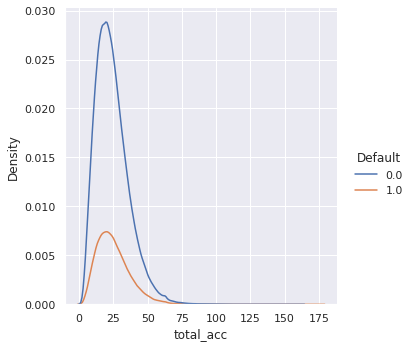

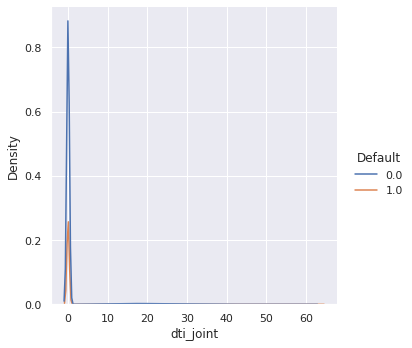

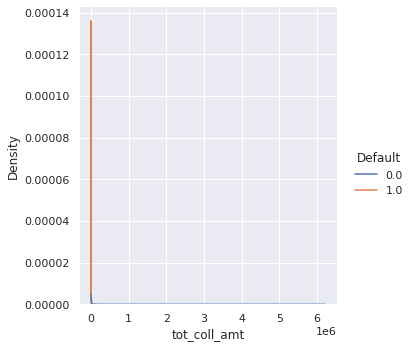

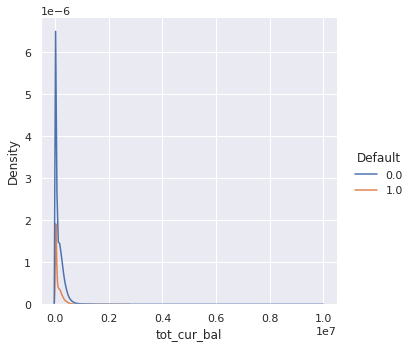

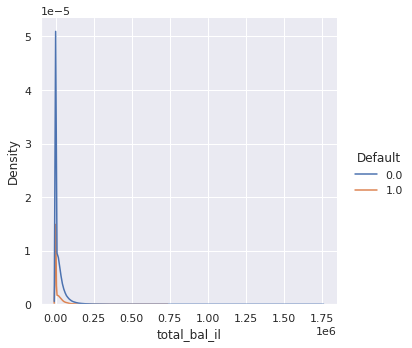

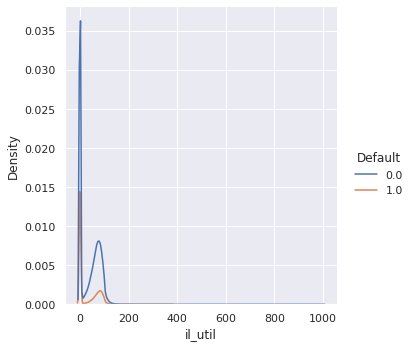

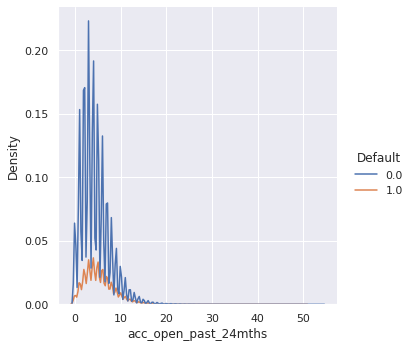

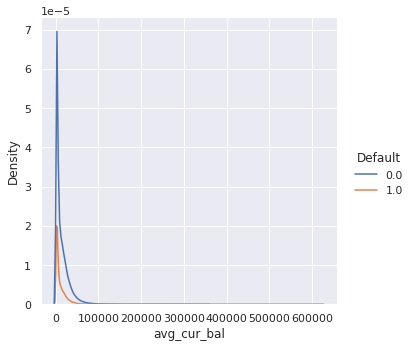

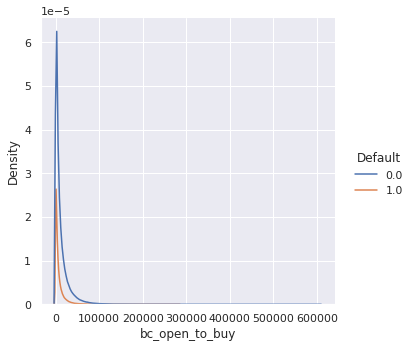

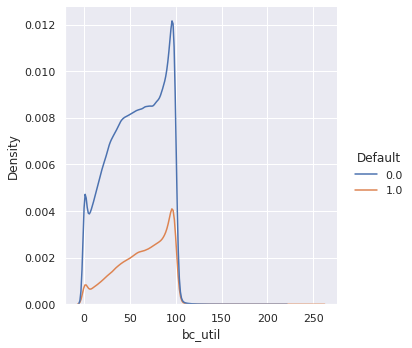

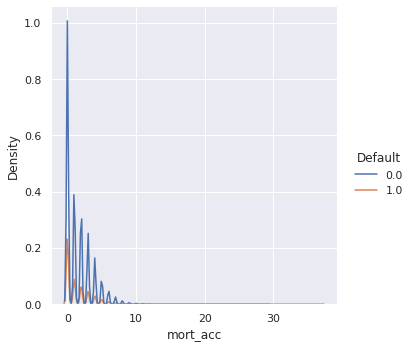

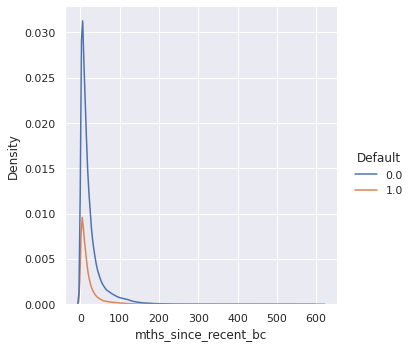

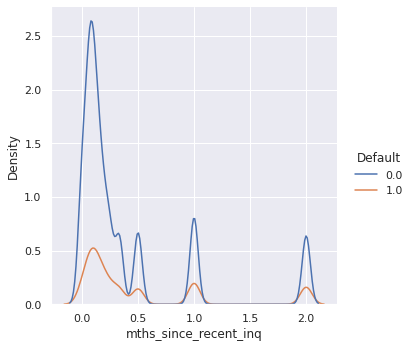

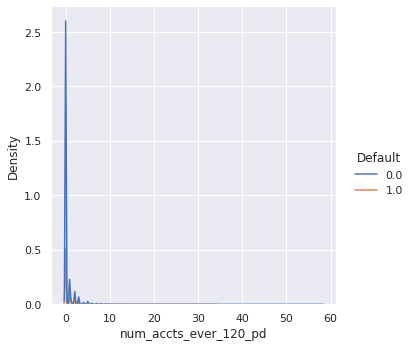

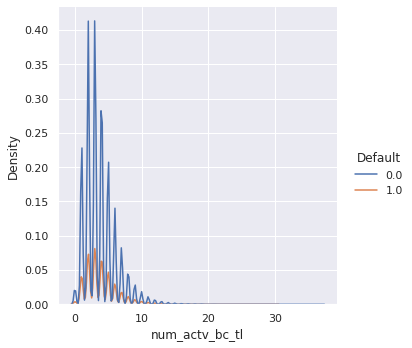

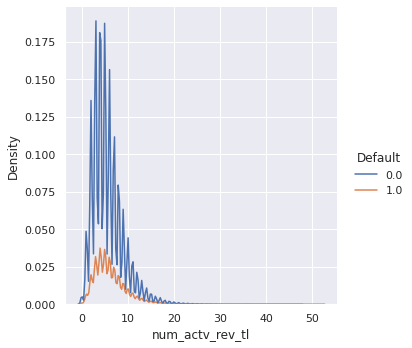

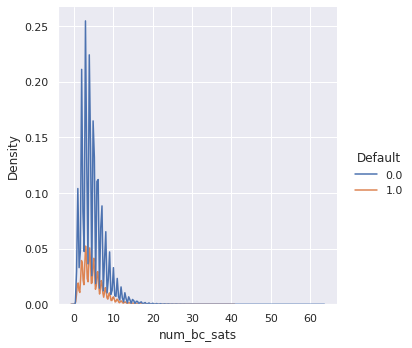

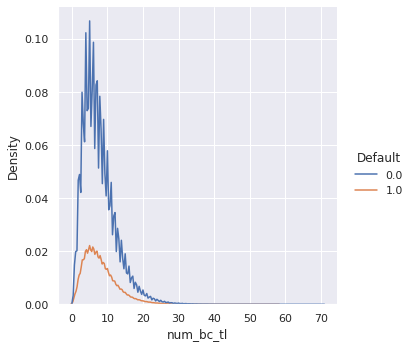

In [26]:
sns.set(color_codes=True)

for col_id in train_mid_19.columns[:-1]:
  if train_mid_19[col_id].dtype == "float64":
    sns.displot(data = train_mid_19, x = col_id, hue = "Default", kind = 'kde')

In [99]:
train_mid_19.describe()

,total_acc,dti_joint,tot_coll_amt,tot_cur_bal,total_bal_il,il_util,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,Default
count,848276.000000,848276.000000,8.482760e+05,8.482760e+05,8.482760e+05,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.000000,848276.00000
mean,24.321741,0.998668,2.345718e+02,1.402002e+05,2.205471e+04,36.739971,4.635430,13152.785152,11044.582049,58.406212,1.531887,24.208240,0.394704,0.503297,3.741803,5.727072,4.841438,7.810064,0.20655
std,12.026121,4.637651,9.059008e+03,1.585059e+05,3.881894e+04,38.749289,3.215532,15872.707970,16225.496916,28.531045,1.890410,31.534618,0.548886,1.354039,2.316304,3.402327,3.019562,4.699211,0.40483
min,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
25%,16.000000,0.000000,0.000000e+00,2.897000e+04,0.000000e+00,0.000000,2.000000,3036.000000,1654.000000,36.000000,0.000000,6.000000,0.076923,0.000000,2.000000,3.000000,3.000000,4.000000,0.00000
50%,23.000000,0.000000,0.000000e+00,7.649400e+04,5.453000e+03,27.000000,4.000000,7069.000000,5236.000000,60.900000,1.000000,14.000000,0.166667,0.000000,3.000000,5.000000,4.000000,7.000000,0.00000
75%,31.000000,0.000000,0.000000e+00,2.094260e+05,3.018600e+04,74.000000,6.000000,18251.000000,13677.000000,83.600000,2.000000,29.000000,0.500000,0.000000,5.000000,7.000000,6.000000,10.000000,0.00000
max,176.000000,63.660000,6.214661e+06,9.971659e+06,1.754743e+06,1000.000000,54.000000,623229.000000,605996.000000,255.200000,37.000000,615.000000,2.000000,58.000000,37.000000,52.000000,63.000000,70.000000,1.00000


In [109]:
# sns.displot(data = train, x = "il_util", hue = "Default", kind = 'kde')
# sns.displot(data = train, x = "tot_cur_bal", hue = "Default", kind = 'kde')
# sns.displot(data = train, x = "tot_hi_cred_lim", hue = "Default", kind = 'kde')
train[["il_util", "total_bal_il", "tot_hi_cred_lim"]].describe()
temp_ = (train["il_util"]/100) * train["tot_hi_cred_lim"]
print(temp_.describe())
print(train[["tot_cur_bal"]].describe())

count    8.482760e+05
mean     6.846528e+04
std      1.187610e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.277595e+04
75%      8.788998e+04
max      7.999999e+06
dtype: float64
        tot_cur_bal
count  8.482760e+05
mean   1.402002e+05
std    1.585059e+05
min    0.000000e+00
25%    2.897000e+04
50%    7.649400e+04
75%    2.094260e+05
max    9.971659e+06


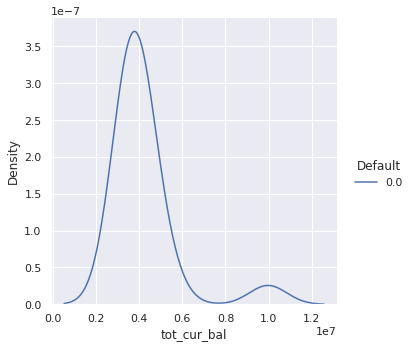

In [90]:
# train_mid_19.loc[train_mid_19["tot_cur_bal"]>209426,"tot_cur_bal"].hist()
sns.displot(data = train_mid_19.loc[train_mid_19["tot_cur_bal"]>3077815,:], x = "tot_cur_bal", hue = "Default", kind = 'kde')

In [98]:
train_mid_19.loc[train_mid_19["tot_cur_bal"]>3077815,:]

,total_acc,application_type,dti_joint,tot_coll_amt,tot_cur_bal,total_bal_il,il_util,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,Default
95900,32.0,Individual,0.00,0.0,4127799.0,0.0,0.0,7.0,229322.0,9103.0,94.7,2.0,7.0,0.333333,0.0,6.0,10.0,7.0,8.0,0.0
107554,36.0,Individual,0.00,0.0,3726495.0,0.0,0.0,8.0,186324.0,20208.0,77.0,4.0,11.0,0.200000,0.0,12.0,14.0,15.0,15.0,0.0
124730,27.0,Individual,0.00,0.0,3652389.0,0.0,0.0,5.0,243493.0,74223.0,65.1,1.0,6.0,2.000000,0.0,6.0,7.0,7.0,10.0,0.0
170871,17.0,Individual,0.00,0.0,4447397.0,0.0,0.0,3.0,555925.0,15109.0,37.0,3.0,6.0,0.000000,0.0,3.0,5.0,3.0,3.0,0.0
236081,46.0,Individual,0.00,0.0,3140639.0,0.0,0.0,7.0,184743.0,75439.0,15.4,1.0,28.0,0.250000,0.0,5.0,5.0,9.0,19.0,0.0
639075,24.0,Individual,0.00,0.0,3610743.0,0.0,0.0,3.0,361074.0,788.0,94.7,5.0,13.0,0.200000,0.0,1.0,3.0,1.0,5.0,0.0
766783,61.0,Individual,0.00,0.0,3370799.0,0.0,0.0,5.0,140450.0,98410.0,23.2,6.0,9.0,0.500000,0.0,8.0,11.0,12.0,19.0,0.0
794493,44.0,Individual,0.00,0.0,9971659.0,200844.0,66.0,4.0,623229.0,11537.0,17.6,7.0,122.0,2.000000,1.0,1.0,2.0,1.0,3.0,0.0
810816,45.0,Individual,0.00,0.0,4535114.0,102634.0,0.0,16.0,238690.0,69612.0,3.3,18.0,150.0,1.000000,0.0,1.0,4.0,3.0,9.0,0.0
838490,45.0,Individual,0.00,0.0,4089463.0,142398.0,92.0,8.0,314574.0,20873.0,63.7,7.0,10.0,2.000000,0.0,3.0,3.0,5.0,8.0,0.0


In [23]:
bins = sc.woebin(train_mid_19.iloc[:, np.r_[7:20]], y = 'Default', 
                min_perc_fine_bin=0.01, # How many bins to cut initially into
                min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                stop_limit=0.02, # Minimum information value 
                max_num_bin=8, # Maximum number of bins
                method='tree'
                )

[INFO] creating woe binning ...


TypeError: ignored

{'num_il_tl': <Figure size 432x288 with 2 Axes>,
 'total_bc_limit': <Figure size 432x288 with 2 Axes>,
 'tax_liens': <Figure size 432x288 with 2 Axes>,
 'bank_dlq': <Figure size 432x288 with 2 Axes>,
 'num_sats': <Figure size 432x288 with 2 Axes>,
 'il_acc': <Figure size 432x288 with 2 Axes>,
 'pub_rec_bankruptcies': <Figure size 432x288 with 2 Axes>,
 'total_il_high_credit_limit': <Figure size 432x288 with 2 Axes>,
 'total_bal_ex_mort': <Figure size 432x288 with 2 Axes>,
 'num_rev_tl_bal_gt_0': <Figure size 432x288 with 2 Axes>,
 'coborrower_inc': <Figure size 432x288 with 2 Axes>,
 'tot_hi_cred_lim': <Figure size 432x288 with 2 Axes>,
 'payment_history': <Figure size 432x288 with 2 Axes>,
 'pct_tl_nvr_dlq': <Figure size 432x288 with 2 Axes>,
 'num_op_rev_tl': <Figure size 432x288 with 2 Axes>,
 'collateral_coverage_ratio': <Figure size 432x288 with 2 Axes>}

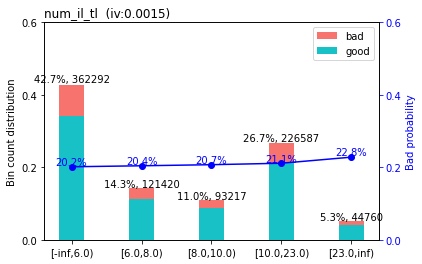

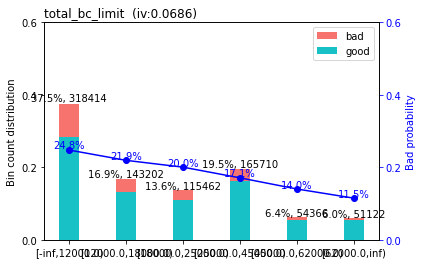

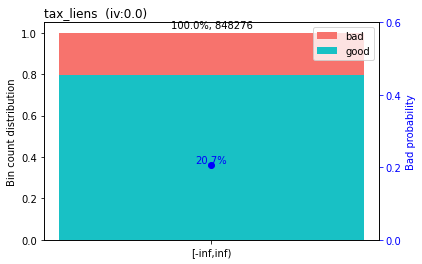

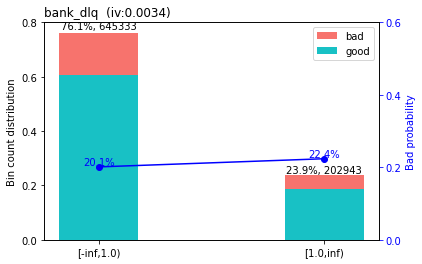

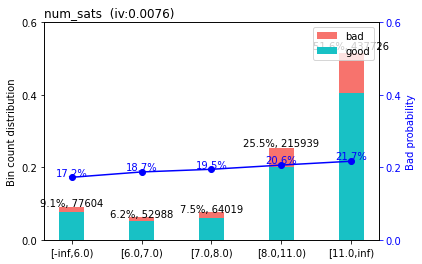

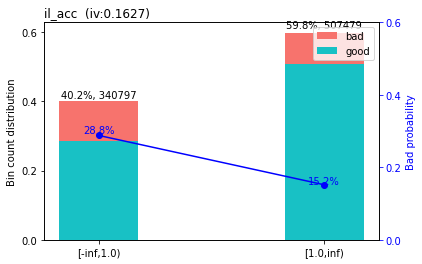

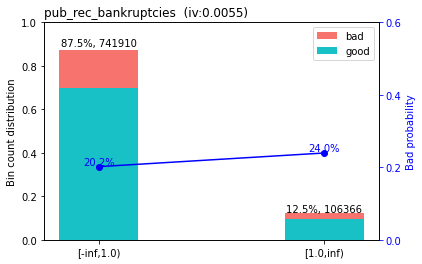

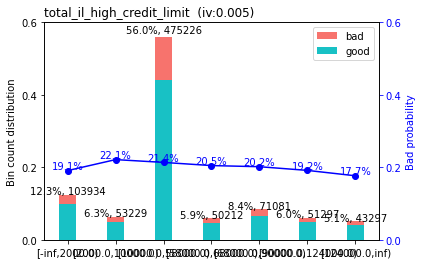

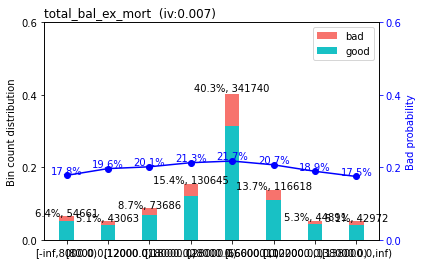

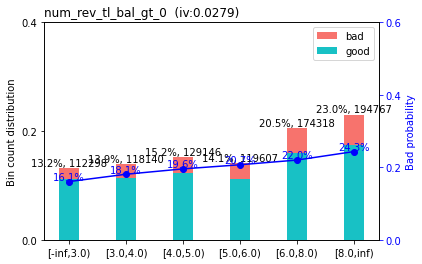

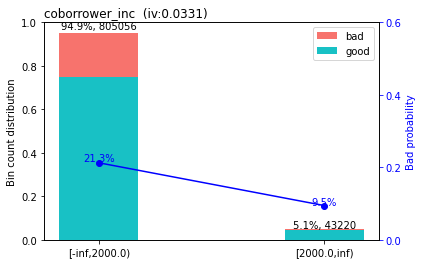

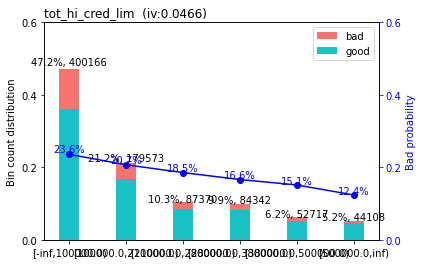

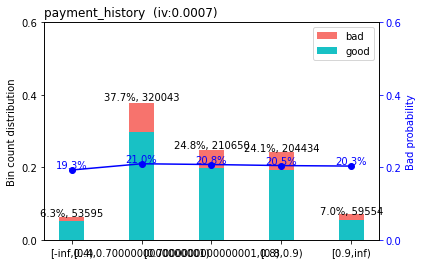

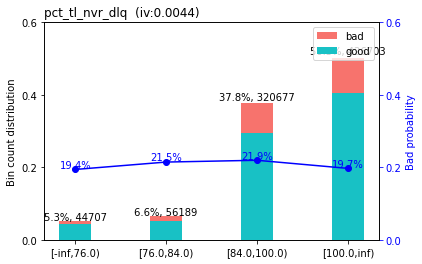

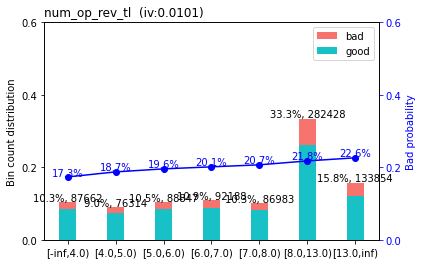

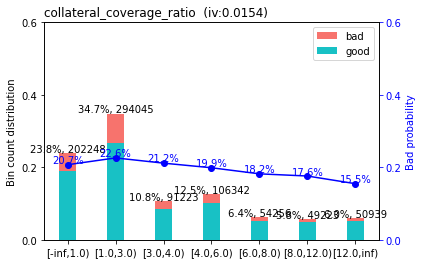

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sc.woebin_plot(bins)

In [ ]:
sc.woebin(train.drop(columns= ['title', 'zip_code', 'addr_state']), y = 'Default', 
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.03,  # Minimum percentage per final bin
                 stop_limit=0.02, # Minimum information value 
                 max_num_bin=8, # Maximum number of bins
                 method='tree'
                 )

[INFO] creating woe binning ...


/usr/local/lib/python3.9/dist-packages/scorecardpy/condition_fun.py:28: UserWarning: There are 1 date/time type columns are removed from input dataset. 
 (ColumnNames: earliest_cr_line)
  warnings.warn("There are {} date/time type columns are removed from input dataset. \n (ColumnNames: {})".format(len(datetime_cols), ', '.join(datetime_cols)))


TypeError: ignored